![](https://logos-download.com/wp-content/uploads/2016/11/Y_Combinator_logo_text_wordmark.png)

# Predict companies' performance - Part 2/2

[Y-Combinator](https://www.ycombinator.com/) is one of the most famous incubator in the world. A lot of enormous licorn like: 
 
* [Dropbox](https://www.dropbox.com/) 
* [Airbnb](https://www.airbnb.com/) 
* [Coinbase](https://www.coinbase.com/) 
* [Stripe](https://stripe.com/) 
* [Zapier](https://zapier.com/)


Now that we have successfully done your linear regression, open a new notebook and try to do, this time, a multiple linear regression on `50_Startups.csv` dataset.

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [ ]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

- Import `50_Startups.csv` dataset

In [ ]:
df = pd.read_csv("/Users/antoinekrajnc/JEDHA Dropbox/Data_Sciences/ESSENTIALS_PROGRAM/V3/M04-Machine_learning/D01-Machine_learning_regressions/01-Exercises/src/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 2 - EDA 📊

- Visualize the relationship between `Marketing Spend` and `Profit`

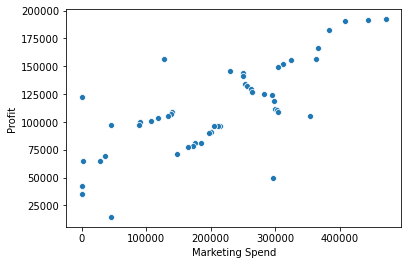

In [ ]:
sns.scatterplot(
            x="Marketing Spend", 
            y="Profit", 
            data=df)


"""
# METHOD 2 
plt.scatter(df.iloc[:, 2], df.iloc[:, -1])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()
"""

- Now visualize `R&D Spend` with `Profit`

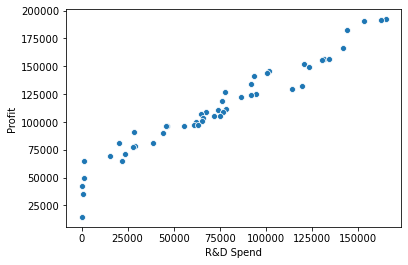

In [ ]:
sns.scatterplot(
            x="R&D Spend", 
            y="Profit", 
            data=df)

"""
# METHOD 2 
plt.scatter(df.iloc[:, 0], df.iloc[:, -1])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()
"""

* Show your dataset's main statistics

In [ ]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


* Check if you see any missing values 

In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [ ]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = df.columns[:-1]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Profit"] # We set "Profit" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



- Split your data in train and test sets

In [ ]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


- Make all the required preprocessings on the train set

In [ ]:
# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0, 1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()


categorical_features = [-1] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
    R&D Spend  Administration  Marketing Spend       State
33   55493.95       103057.49        214634.81     Florida
35   46014.02        85047.44        205517.64    New York
26   75328.87       144135.98        134050.07     Florida
34   46426.07       157693.92        210797.67  California
18   91749.16       114175.79        294919.57     Florida

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          1.          0.         -0.35006454 -0.78547109  0.1011968 ]
 [ 0.          0.          1.         -0.55530319 -1.48117426  0.02734979]
 [ 0.          1.          0.          0.07935762  0.80133381 -0.55152132]
 [ 1.          0.          0.         -0.54638238  1.32505817  0.07011684]
 [ 0.          1.          0.          0.43485371 -0.35598663  0.75148516]]



## Build your model 🏋️‍♂️

- Create and fit your model

In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


- Make predictions on train set

In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646]



- Make predictions on test set (make sure you apply the same preprocessings as before!)

In [ ]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

--- Testing pipeline ---
Standardizing numerical features...
    R&D Spend  Administration  Marketing Spend       State
28   66051.52       182645.56        118148.20     Florida
11  100671.96        91790.61        249744.55  California
10  101913.08       110594.11        229160.95     Florida
41   27892.92        84710.77        164470.71     Florida
2   153441.51       101145.55        407934.54     Florida
27   72107.60       127864.55        353183.81    New York
38   20229.59        65947.93        185265.10    New York
31   61136.38       152701.92         88218.23    New York
22   73994.56       122782.75        303319.26     Florida
4   142107.34        91391.77        366168.42     Florida

...Done.
[[ 0.          1.          0.         -0.1214952   2.2889053  -0.68032287]
 [ 1.          0.          0.          0.6280306  -1.22069499  0.38557774]
 [ 0.          1.          0.          0.65490061 -0.49434195  0.21885524]
 [ 0.          1.          0.         -0.94762148 -1.49

- Let's see scores of your model on train and test set.

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.9501847627493607
R2 score on test set :  0.9347068473282426


- What do you think about it ?

>Very small overfitting. We can consider our model performant!

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking

All transformers are:  [('cat', OneHotEncoder(), [-1]), ('num', StandardScaler(), [0, 1, 2])]
One Hot Encoder transformer is:  OneHotEncoder()
Categorical columns are:  [array(['California', 'Florida', 'New York'], dtype=object)]
numerical columns are:  Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')
All columns name are:  ['California' 'Florida' 'New York' 'R&D Spend' 'Administration'
 'Marketing Spend']


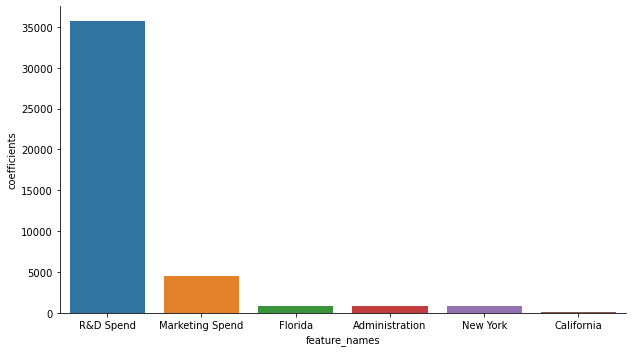

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])


# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All columns name are: ", all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph
